In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

## Loading and exploring the dataset

In [222]:
df = pd.read_csv("creditcard.csv")

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Normalizing data

In [254]:
new_df = df.loc[:,"V1":"Amount"]
fraud_class = df["Class"]
min_max_scaler = preprocessing.MinMaxScaler()
index, cols = new_df.index, new_df.columns
x_scaled = min_max_scaler.fit_transform(new_df)
norm_df = pd.DataFrame(x_scaled, columns=cols)
norm_df["Class"] = fraud_class
norm_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


## Random Forest Classifier for the initial dataset

In [241]:
X, y = norm_df.loc[:,"V1":"Amount"], norm_df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestClassifier(max_depth=2, n_estimators=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print classification_report(y_test, predictions)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93838
          1       0.87      0.59      0.70       149

avg / total       1.00      1.00      1.00     93987



In [242]:
print confusion_matrix(y_test, predictions)

[[93825    13]
 [   61    88]]


## Exploring imbalanced classes

Number of fraud transactions: 15252
Number of legitimate transactions: 8813765
Ration of fraud/legitimate transactions = 0.00173047500132


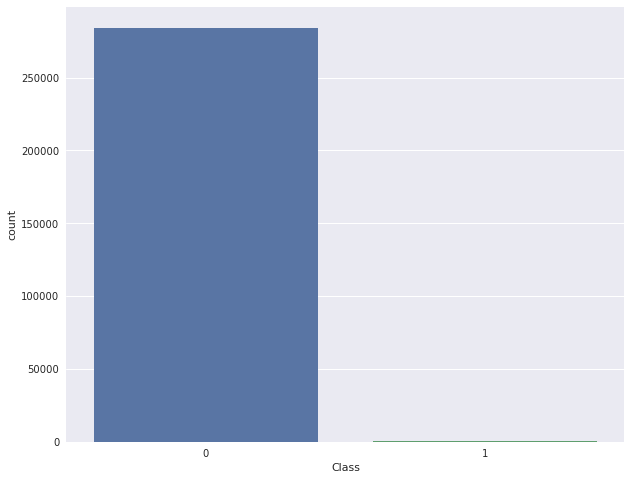

In [89]:
fraud = norm_df[norm_df["Class"] == 1].size
legit = norm_df[norm_df["Class"] == 0].size

print "Number of fraud transactions: {}".format(fraud)
print "Number of legitimate transactions: {}".format(legit)
print "Ration of fraud/legitimate transactions = {}".format(float(fraud)/float(legit))
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.countplot(data=norm_df, x="Class")

Conclusion: It's apparent that the dataset is highly imbalanced and this is the reason we get a quite high precision in our predictions while the recall is still not good enough. Let's try to see if this can be improved by oversampling the fraud (minor) class, or undersampling the legit (major) class.

## Undersampling

In [270]:
under_sampling_fraud = norm_df[norm_df["Class"] == 1]
under_size = under_sampling_fraud.size
under_sampling_legit = norm_df[norm_df["Class"] == 0].sample(under_size)

df_under = pd.concat([under_sampling_legit, under_sampling_fraud])
X_under, y_under = df_under.loc[:,"V1":"V28"], df_under["Class"]

X_train_under, X_test_under, y_train_under, y_test_under = (
    train_test_split(X_under, y_under, test_size=0.33, random_state=42))

clf_under = RandomForestClassifier(max_depth=2, n_estimators=20)

clf_under.fit(X_train_under, y_train_under)

predictions_under = clf_under.predict(X_test_under)

print classification_report(y_test_under, predictions_under)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      4874
          1       0.98      0.73      0.84       160

avg / total       0.99      0.99      0.99      5034



## Ovesampling

In [286]:
over_sampling_fraud = norm_df[norm_df["Class"] == 1]
over_sampling_legit = norm_df[norm_df["Class"] == 0]

df_fraud= pd.concat([over_sampling_fraud]*200)
df_over = pd.concat([over_sampling_legit, df_fraud])
X_over, y_over = df_over.loc[:, "V1":"V28"], df_over["Class"]

X_train_over, X_test_over, y_train_over, y_test_over = (
    train_test_split(X_over, y_over, test_size=0.33, random_state=42))

clf_over = RandomForestClassifier(max_depth=2, n_estimators=20)

clf_over.fit(X_train_over, y_train_over)

predictions_over = clf_over.predict(X_test_over)

print classification_report(y_test_over, predictions_over)

             precision    recall  f1-score   support

          0       0.95      1.00      0.97     93595
          1       1.00      0.85      0.91     32701

avg / total       0.96      0.96      0.96    126296

